In [141]:
# Importar las librerías necesarias para gráficar y cargar la información
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [108]:
# Cargar los datos
df = pd.read_csv('data/df_mexico_conectado_con_indice_marginacion.csv')

In [137]:
num_municipios = df['municipio'].count()
print(num_municipios)

2469


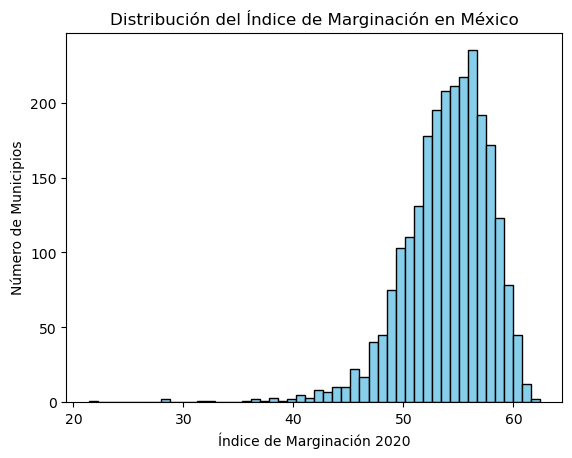

In [135]:
# Histograma del Índice de Marginación por Municipio
plt.hist(df['indice_marginacion_2020'], 
         bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución del Índice de Marginación en México')
plt.xlabel('Índice de Marginación 2020')
plt.ylabel('Número de Municipios')
plt.show()

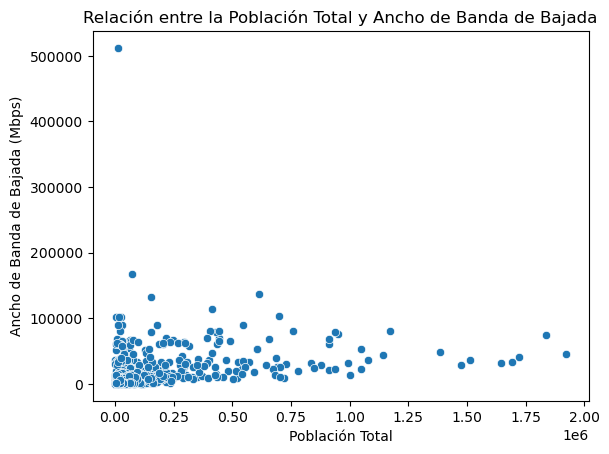

In [112]:
# Asegúrate de que 'poblacion_total', 'ancho_banda_bajada' estén en el formato correcto.
sns.scatterplot(x='poblacion_total', y='ancho_banda_bajada', data=df)
plt.title('Relación entre la Población Total y Ancho de Banda de Bajada')
plt.xlabel('Población Total')
plt.ylabel('Ancho de Banda de Bajada (Mbps)')
plt.show()

In [20]:
# Ver los tipos de datos de las columnas
print(df.dtypes)

clave_entidad                            int64
estado                                  object
clave_municipio                          int64
municipio                               object
poblacion_total                          int64
analf                                  float64
sbasc                                  float64
ovsde                                  float64
ovsee                                  float64
ovsae                                  float64
ovpt                                   float64
vhac                                   float64
pl.5000                                float64
po2sm                                  float64
indice_marginacion_2020                float64
grado_marginacion_2020                  object
indice_marginacion_normalizado_2020    float64
lugar_nacional                           int64
ancho_banda_bajada                     float64
ancho_banda_subida                     float64
conteo_registros                         int64
dtype: object

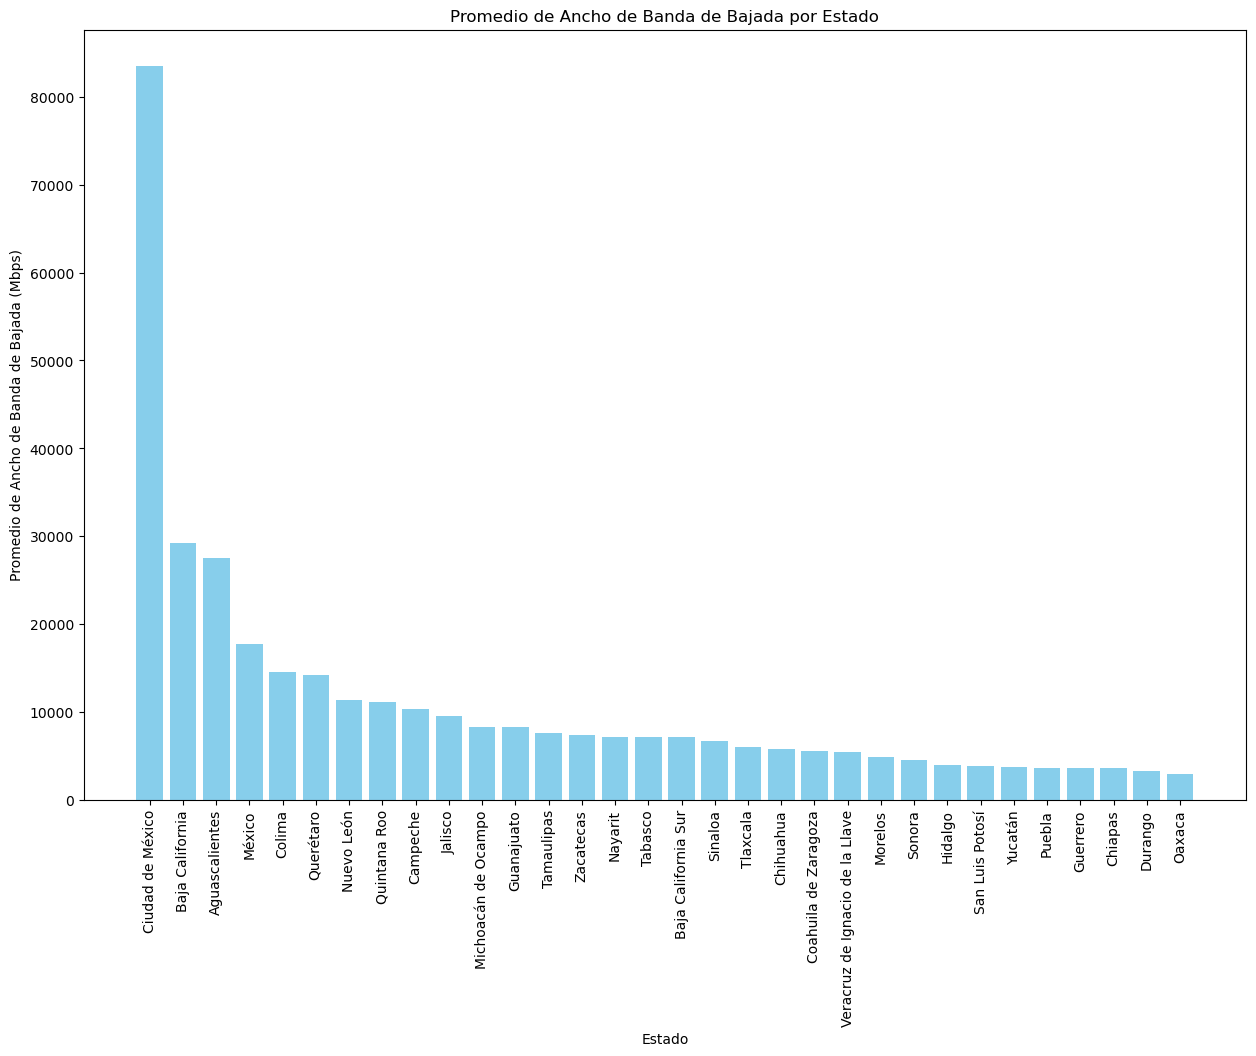

In [80]:
# ANCHO DE BANDA DE BAJADA PROMEDIO POR ESTADO
# Calcular el promedio de ancho de banda de bajada por estado
df_promedio_bajada = df.groupby('estado')['ancho_banda_bajada'].mean().reset_index()

# Ordenar los resultados de mayor a menor
df_promedio_bajada = df_promedio_bajada.sort_values('ancho_banda_bajada', ascending=False)

# Graficar el promedio de ancho de banda de bajada por estado
plt.figure(figsize=(15, 10))
plt.bar(df_promedio_bajada['estado'], df_promedio_bajada['ancho_banda_bajada'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Promedio de Ancho de Banda de Bajada (Mbps)')
plt.title('Promedio de Ancho de Banda de Bajada por Estado')
plt.xticks(rotation=90)
plt.show()

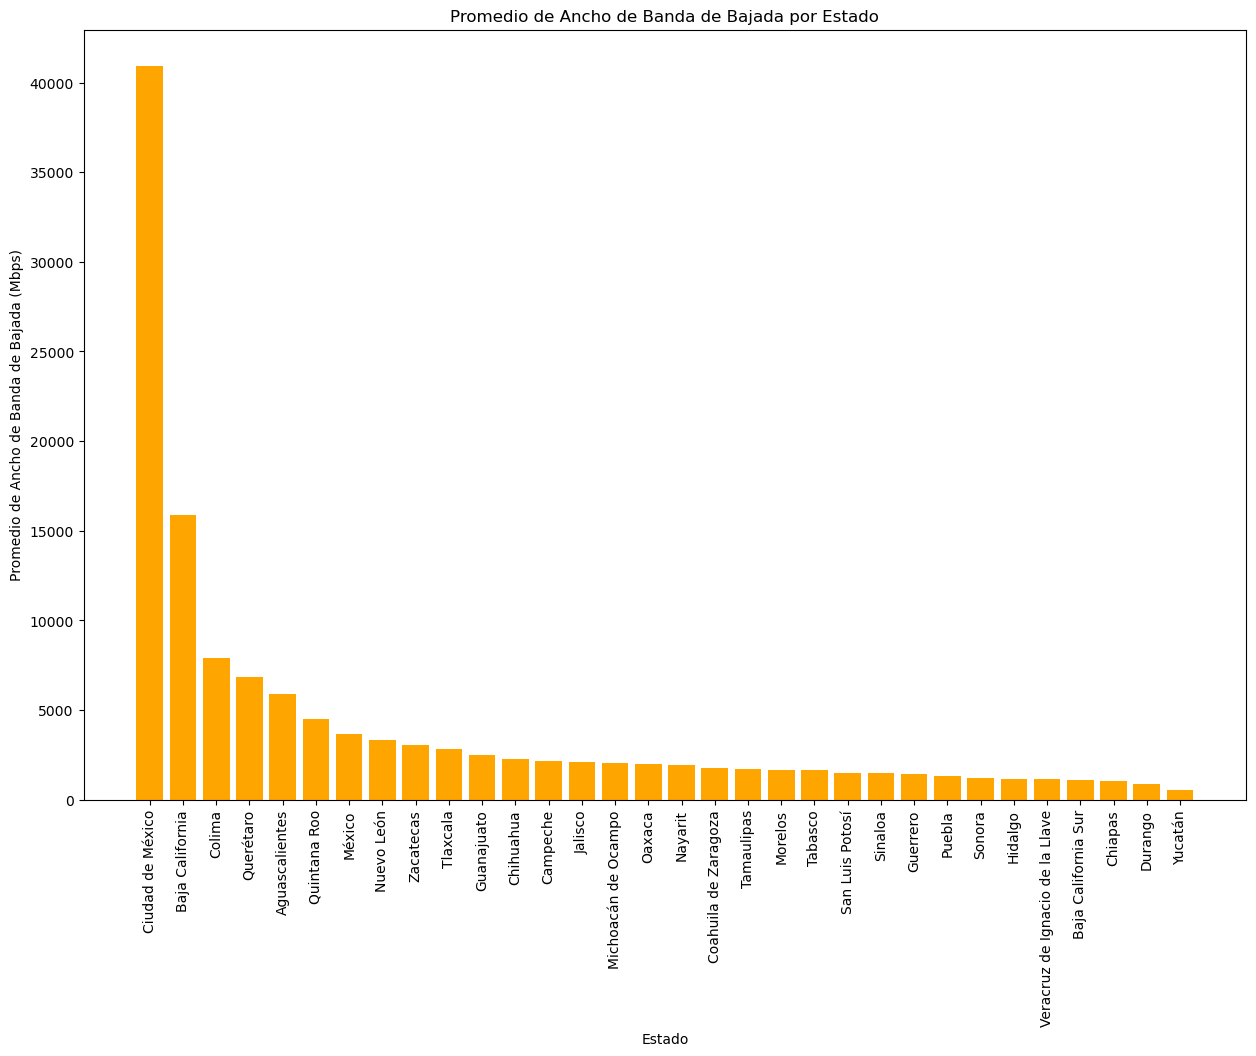

In [82]:
# ANCHO DE BANDA DE SUBIDA PROMEDIO POR ESTADO
# Calcular el promedio de ancho de subida de bajada por estado
df_promedio_subida = df.groupby('estado')['ancho_banda_subida'].mean().reset_index()

# Ordenar los resultados de mayor a menor
df_promedio_subida = df_promedio_subida.sort_values('ancho_banda_subida', ascending=False)

# Graficar el promedio de ancho de banda de bajada por estado
plt.figure(figsize=(15, 10))
plt.bar(df_promedio_subida['estado'], df_promedio_subida['ancho_banda_subida'], color='orange')
plt.xlabel('Estado')
plt.ylabel('Promedio de Ancho de Banda de Bajada (Mbps)')
plt.title('Promedio de Ancho de Banda de Bajada por Estado')
plt.xticks(rotation=90)
plt.show()

In [47]:
print(df_promedio_bajada)

                             estado  ancho_banda_bajada
6                  Ciudad de México        83504.654517
1                   Baja California        29227.407863
0                    Aguascalientes        27468.945694
16                           México        17773.613010
8                            Colima        14566.345689
21                        Querétaro        14225.635715
18                       Nuevo León        11334.815292
22                     Quintana Roo        11084.759815
3                          Campeche        10262.997358
13                          Jalisco         9511.795849
14              Michoacán de Ocampo         8295.476354
10                       Guanajuato         8211.510287
27                       Tamaulipas         7588.096418
31                        Zacatecas         7321.895372
17                          Nayarit         7139.299112
26                          Tabasco         7090.815628
2               Baja California Sur         7085

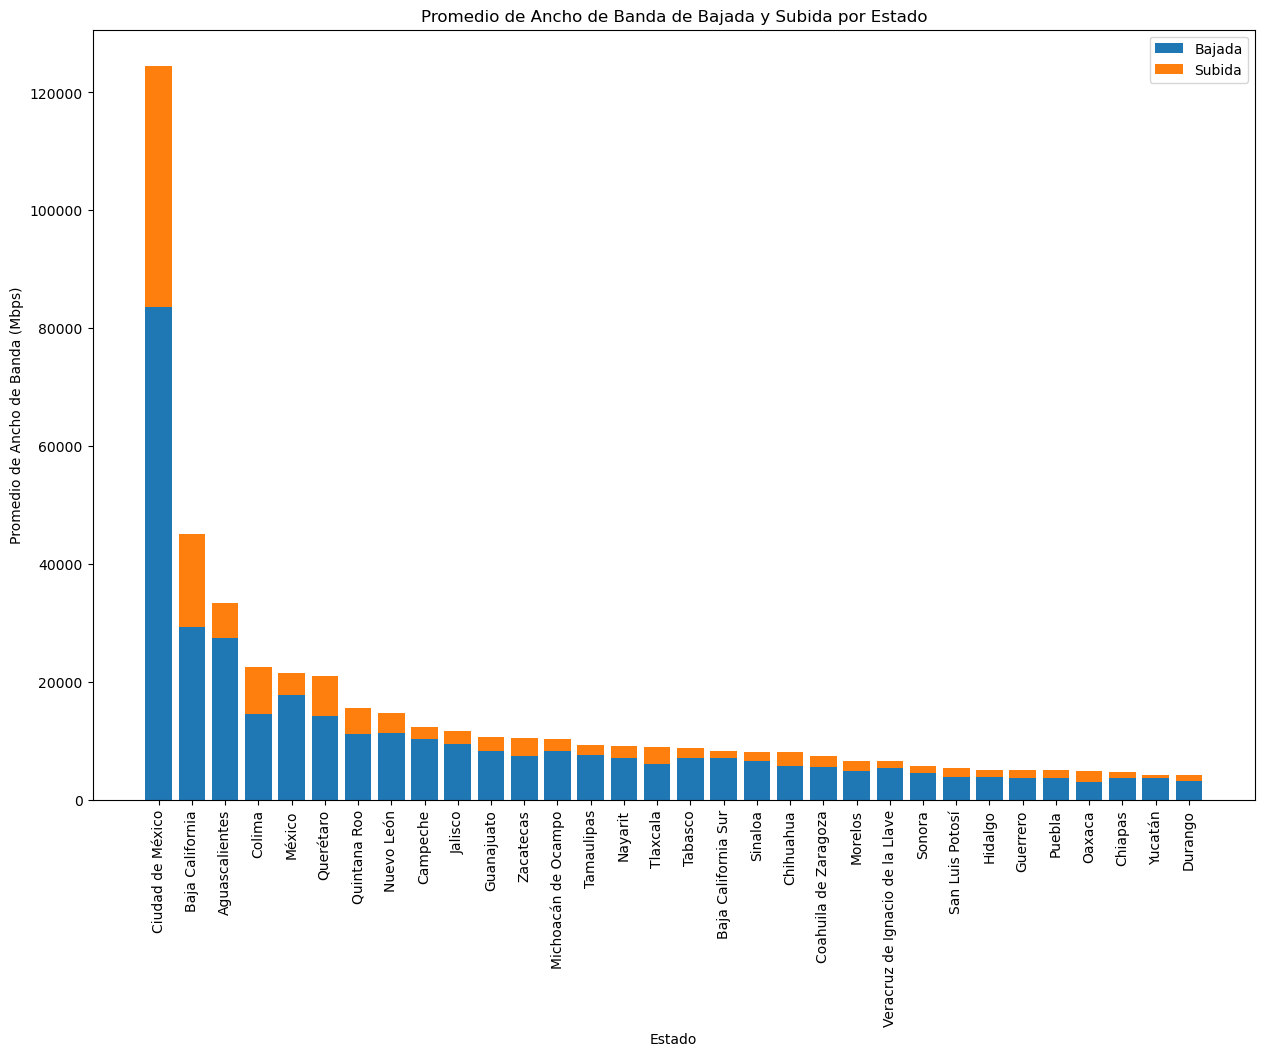

In [61]:
# Calcular promedio de ancho de banda de bajada y subida por estado
df_promedio = df.groupby('estado').agg(
    {'ancho_banda_bajada':'mean', 'ancho_banda_subida':'mean'}).reset_index()

# Calculamos el total de ancho de banda (subida + bajada)
df_promedio['total_ancho_banda'] = df_promedio['ancho_banda_bajada'] + df_promedio['ancho_banda_subida']

# Ordenamos de mayor a menor
df_promedio = df_promedio.sort_values('total_ancho_banda', ascending=False)

# Graficamos con gráfica de barras comparando ancho de banda de bajada vs subida por estado
plt.figure(figsize=(15, 10))
plt.bar(df_promedio['estado'], df_promedio['ancho_banda_bajada'], label='Bajada')
plt.bar(df_promedio['estado'], df_promedio['ancho_banda_subida'], label='Subida', 
        bottom=df_promedio['ancho_banda_bajada'])
plt.xlabel('Estado')
plt.ylabel('Promedio de Ancho de Banda (Mbps)')
plt.title('Promedio de Ancho de Banda de Bajada y Subida por Estado')
plt.legend()
plt.xticks(rotation=90)
plt.show()

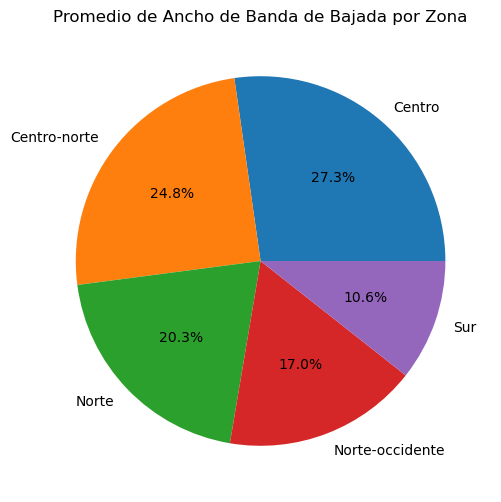

In [63]:
# Gráfica Circular de Ancho de Banda de Bajada por Zonas

# Diccionario de estados a zonas
zonas = {
    "Norte": ["Baja California", "Sonora", "Chihuahua", "Coahuila de Zaragoza", "Nuevo León", "Tamaulipas"],
    "Norte-occidente": ["Baja California Sur", "Sinaloa", "Nayarit", "Durango", "Zacatecas"],
    "Centro-norte": ["Jalisco", "Aguascalientes", "Colima", "Michoacán de Ocampo", "San Luis Potosí"],
    "Centro": ["Guanajuato", "Querétaro", "Hidalgo", "México", "Ciudad de México", "Morelos", "Tlaxcala", "Puebla"],
    "Sur": ["Guerrero", "Oaxaca", "Chiapas", "Veracruz de Ignacio de la Llave", "Tabasco", "Campeche", "Yucatán", "Quintana Roo"]
}

# Invertir el diccionario para mapeo directo
estado_a_zona = {estado: zona for zona, estados in zonas.items() for estado in estados}
df['zona'] = df['estado'].map(estado_a_zona)

# Calcular promedio de ancho de banda de bajada por zona
df_promedio = df.groupby('zona')['ancho_banda_bajada'].mean().reset_index()

# Graficar en pie chart
plt.figure(figsize=(10, 6))
plt.pie(df_promedio['ancho_banda_bajada'], labels=df_promedio['zona'], autopct='%1.1f%%')
plt.title('Promedio de Ancho de Banda de Bajada por Zona')
plt.show()

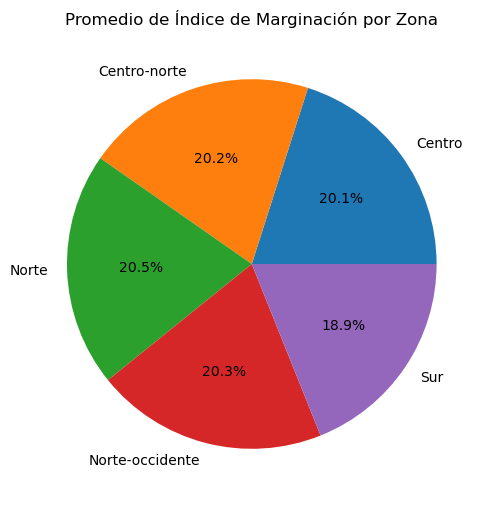

In [65]:
# Calcular promedio de ancho de banda de bajada por zona
df_promedio = df.groupby('zona')['indice_marginacion_2020'].mean().reset_index()

# Graficar en pie chart
plt.figure(figsize=(10, 6))
plt.pie(df_promedio['indice_marginacion_2020'], labels=df_promedio['zona'], autopct='%1.1f%%')
plt.title('Promedio de Índice de Marginación por Zona')
plt.show()

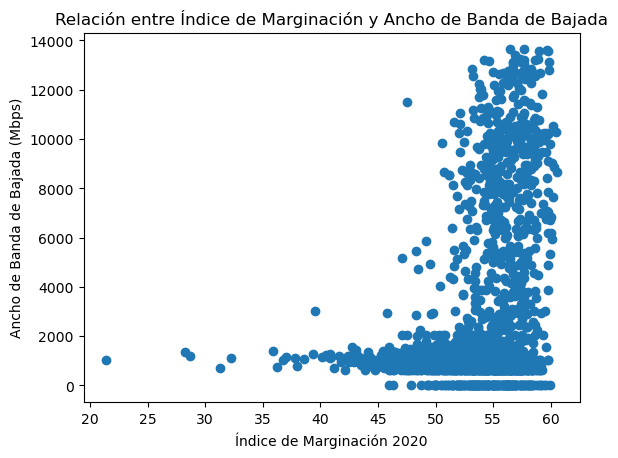

In [69]:
# Diagrama de Dispersión: Ancho de Banda de Bajada de acuerdo al Índice de Marginación

# Calculamos el rango intercuartil
Q1 = df['ancho_banda_bajada'].quantile(0.25)
Q3 = df['ancho_banda_bajada'].quantile(0.75)
IQR = Q3 - Q1

# Filtramos anomalías (valores muy elevados o muy bajos)
filtro = (df['ancho_banda_bajada'] >= Q1 - 1.5 * IQR) & (df['ancho_banda_bajada'] <= Q3 + 1.5 * IQR)
df_filtrado = df[filtro]

# Se gráfica el diagrama de dispersión
plt.scatter(df_filtrado['indice_marginacion_2020'], df_filtrado['ancho_banda_bajada'])
plt.xlabel('Índice de Marginación 2020')
plt.ylabel('Ancho de Banda de Bajada (Mbps)')
plt.title('Relación entre Índice de Marginación y Ancho de Banda de Bajada')
plt.show()

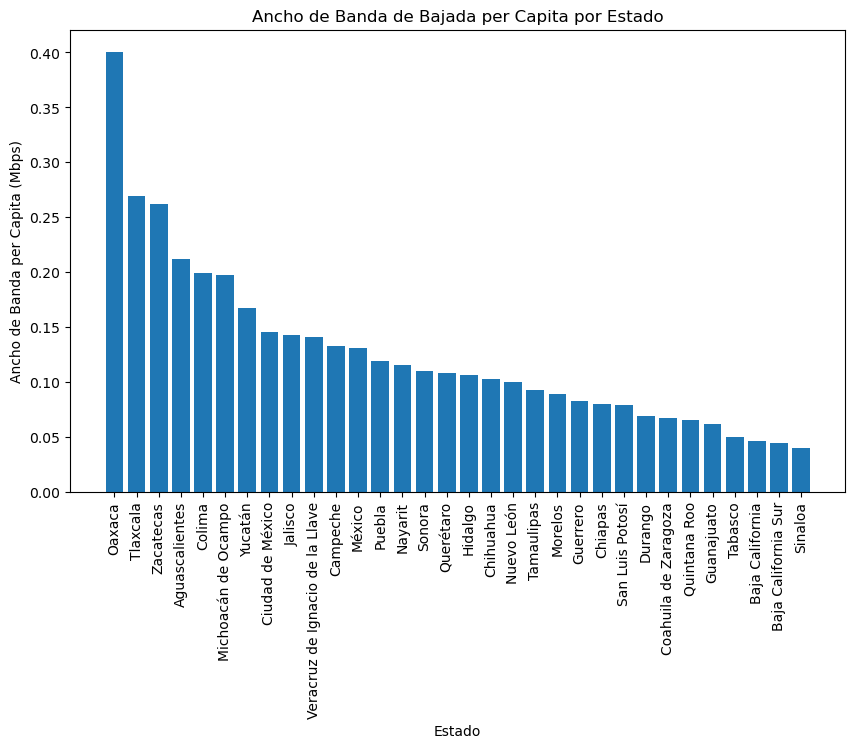

In [75]:
# Sumar el ancho de banda de bajada y la población total por estado
estado_bw = df.groupby('estado').agg({'ancho_banda_bajada':'sum', 'poblacion_total':'sum'})

# Calcular ancho de banda de bajada por persona
estado_bw['bw_per_person'] = estado_bw['ancho_banda_bajada'] / estado_bw['poblacion_total']

# Ordenar de mayor a menor por 'bw_per_person'
estado_bw = estado_bw.sort_values('bw_per_person', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.bar(estado_bw.index, estado_bw['bw_per_person'])
plt.title('Ancho de Banda de Bajada per Capita por Estado')
plt.xlabel('Estado')
plt.ylabel('Ancho de Banda per Capita (Mbps)')
plt.xticks(rotation=90)
plt.show()

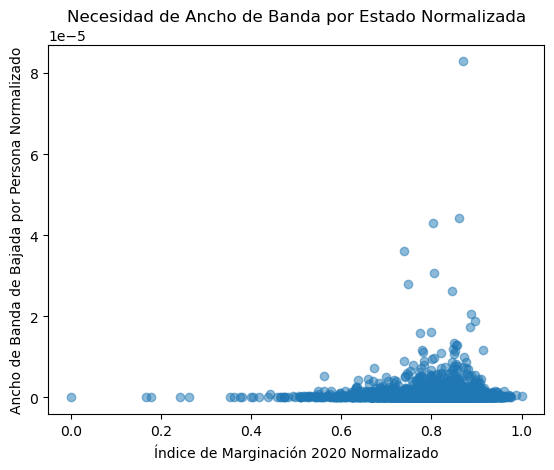

In [88]:
# Normalizar los datos
scaler = MinMaxScaler()
df_normalizado = df.copy()
df_normalizado[['indice_marginacion_2020', 'ancho_banda_bajada']] = scaler.fit_transform(df_normalizado[['indice_marginacion_2020', 'ancho_banda_bajada']])

# Calcular ancho de banda por persona
df_normalizado['bw_per_person'] = df_normalizado['ancho_banda_bajada'] / df_normalizado['poblacion_total']

# Graficar
plt.scatter(df_normalizado['indice_marginacion_2020'], df_normalizado['bw_per_person'], alpha=0.5)
plt.xlabel('Índice de Marginación 2020 Normalizado')
plt.ylabel('Ancho de Banda de Bajada por Persona Normalizado')
plt.title('Necesidad de Ancho de Banda por Estado Normalizada')
plt.show()

In [132]:
tmp_df = df.copy()
tmp_df = tmp_df.groupby('estado')[['indice_marginacion_2020', 'ancho_banda_bajada', 'ancho_banda_subida']].mean()
print(tmp_df)

                                 indice_marginacion_2020  ancho_banda_bajada  \
estado                                                                         
Aguascalientes                                 57.778190        27468.945694   
Baja California                                57.781341        29227.407863   
Baja California Sur                            58.632937         7085.726705   
Campeche                                       54.681047        10262.997358   
Chiapas                                        51.026488         3579.891101   
Chihuahua                                      53.909870         5730.886665   
Ciudad de México                               60.141875        83504.654517   
Coahuila de Zaragoza                           58.047215         5558.312802   
Colima                                         57.850664        14566.345689   
Durango                                        54.841681         3238.452213   
Guanajuato                              

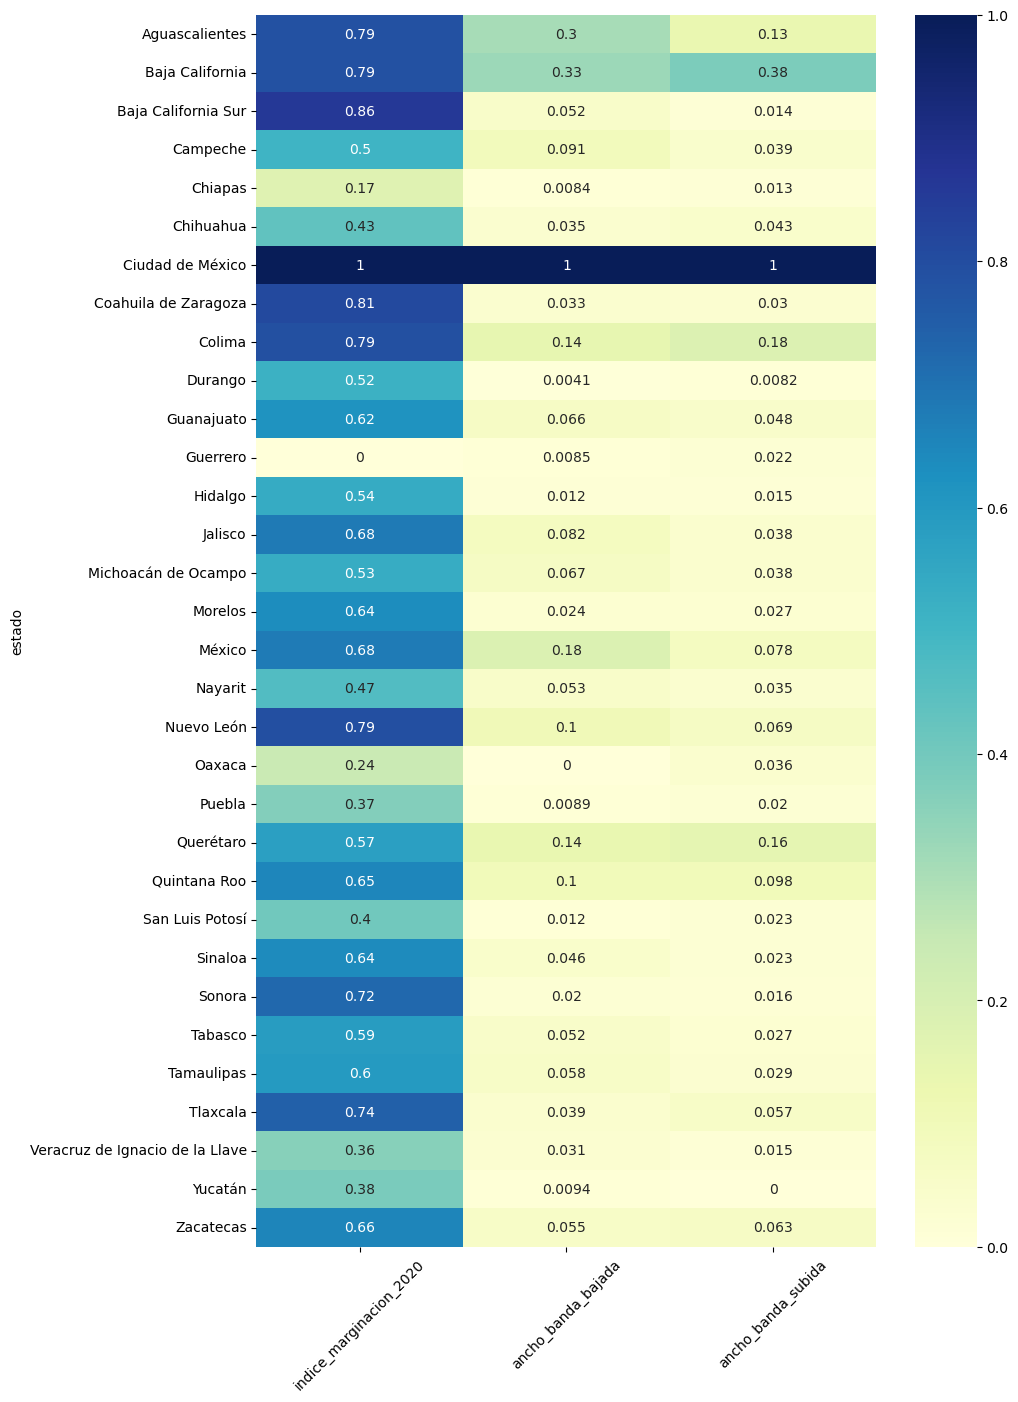

In [130]:
# Mapa de Calor Normalizado de Índice de Marginación, Ancho de Banda de Bajada y Subida por Estado
heatmap_df = df.copy()
# Se agrupa la información por estado y se calculan promedios.
hm_grouped_data = heatmap_df.groupby('estado')[
    ['indice_marginacion_2020', 'ancho_banda_bajada', 'ancho_banda_subida']].mean()

# Normalizar los Datos a una escala coherente, mostrando máximos como 1 y mínimos como 0
scaler = MinMaxScaler()
hm_grouped_data[['indice_marginacion_2020', 'ancho_banda_bajada', 'ancho_banda_subida']] = 
scaler.fit_transform(hm_grouped_data[['indice_marginacion_2020', 'ancho_banda_bajada', 'ancho_banda_subida']])

# Se gráfica el mapa de calor, indicando su tamaño, información, paleta de color y etiquetas.
plt.figure(figsize=(10, len(hm_grouped_data)/2)) 
sns.heatmap(hm_grouped_data, annot=True, cmap="YlGnBu")
plt.xticks(rotation=45)
plt.show()

In [102]:
df_heatmap = df
df_heatmap.head(5)

,clave_entidad,estado,clave_municipio,municipio,poblacion_total,analf,sbasc,ovsde,ovsee,ovsae,...,po2sm,indice_marginacion_2020,grado_marginacion_2020,indice_marginacion_normalizado_2020,lugar_nacional,ancho_banda_bajada,ancho_banda_subida,conteo_registros,zona,bw_per_person
0,1,Aguascalientes,1001,AGUASCALIENTES,948990,1.644738,20.367220,0.104799,0.113169,0.378610,...,54.226594,0.949297,Muy bajo,0.944508,2435,0.149779,27160.015968,501,Centro-norte,1.578298e-07
1,1,Aguascalientes,1002,ASIENTOS,51536,3.526405,33.906364,2.650373,0.486448,0.858160,...,78.565471,0.857258,Muy bajo,0.885433,1816,0.001837,256.000000,20,Centro-norte,3.565469e-08
2,1,Aguascalientes,1003,CALVILLO,58250,4.491509,42.482450,0.365177,0.516760,0.800978,...,79.259777,0.869753,Muy bajo,0.893453,1932,0.001518,256.000000,14,Centro-norte,2.605763e-08
3,1,Aguascalientes,1004,COSÍO,17000,3.144867,27.696745,0.712855,0.577354,0.659833,...,81.726369,0.871114,Muy bajo,0.894326,1948,0.001531,256.000000,8,Centro-norte,9.007353e-08
4,1,Aguascalientes,1005,JESÚS MARÍA,129929,2.380588,26.692477,0.277034,0.354957,0.860426,...,56.748753,0.917411,Muy bajo,0.924042,2323,0.069486,10056.533333,72,Centro-norte,5.348006e-07
